In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [9]:
train_file = './train.csv'
test_file = './test.csv'
output_file = 'submission.csv'

In [10]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(raw_data[:, 1:], raw_data[:, 0], test_size=0.1)

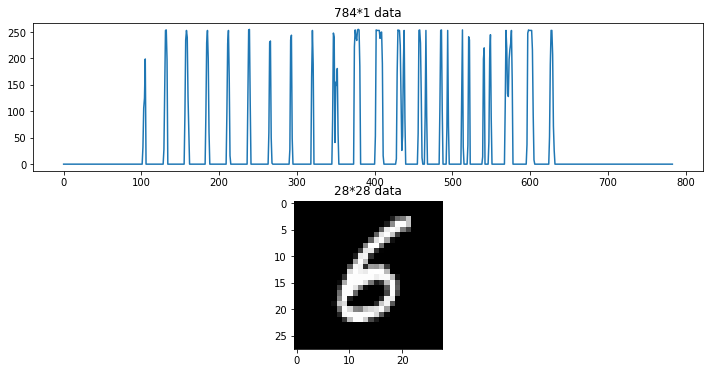

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(x_train[0])
ax[0].set_title('784*1 data')
ax[1].imshow(x_train[0].reshape(28, 28), cmap='gray')
ax[1].set_title('28*28 data')

In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print(y_train[0])

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [13]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [14]:
datagen = ImageDataGenerator(zoom_range=0.1, height_shift_range=0.1, 
                            width_shift_range=0.1, rotation_range=10)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])

In [16]:
annealer = LearningRateScheduler(lambda x: 1e-3*0.9**x)

In [18]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=16), 
                         steps_per_epoch=500, epochs=20, verbose=2, 
                         validation_data=(x_val[:400, :], y_val[:400, :]),
                         callbacks=[annealer])

Epoch 1/20
24s - loss: 0.8567 - acc: 0.7201 - val_loss: 0.9445 - val_acc: 0.7750
Epoch 2/20
24s - loss: 0.3562 - acc: 0.8856 - val_loss: 0.1166 - val_acc: 0.9550
Epoch 3/20
25s - loss: 0.2843 - acc: 0.9075 - val_loss: 0.0999 - val_acc: 0.9750
Epoch 4/20
25s - loss: 0.2297 - acc: 0.9291 - val_loss: 0.0726 - val_acc: 0.9800
Epoch 5/20
25s - loss: 0.2099 - acc: 0.9339 - val_loss: 0.0452 - val_acc: 0.9875
Epoch 6/20
25s - loss: 0.1916 - acc: 0.9432 - val_loss: 0.0471 - val_acc: 0.9850
Epoch 7/20
25s - loss: 0.1612 - acc: 0.9496 - val_loss: 0.0361 - val_acc: 0.9900
Epoch 8/20
26s - loss: 0.1560 - acc: 0.9517 - val_loss: 0.0491 - val_acc: 0.9875
Epoch 9/20
28s - loss: 0.1416 - acc: 0.9554 - val_loss: 0.0607 - val_acc: 0.9875
Epoch 10/20
26s - loss: 0.1311 - acc: 0.9593 - val_loss: 0.0580 - val_acc: 0.9900
Epoch 11/20
26s - loss: 0.1271 - acc: 0.9585 - val_loss: 0.0480 - val_acc: 0.9875
Epoch 12/20
25s - loss: 0.1185 - acc: 0.9626 - val_loss: 0.0383 - val_acc: 0.9925
Epoch 13/20
25s - loss: 0

In [21]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print('Final loss: %.4f, final accuracy:%.4f'%(final_loss, final_acc))

Final loss: 0.0253, final accuracy:0.9921


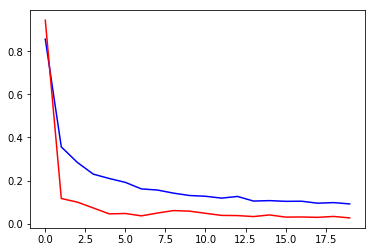

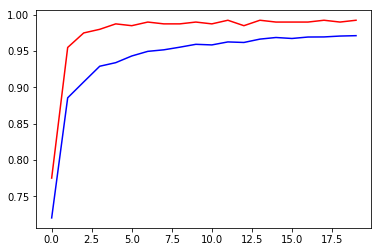

In [22]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [23]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[420   0   1   0   0   0   0   0   0   0]
 [  0 467   0   0   0   0   0   0   0   0]
 [  1   0 402   0   0   0   0   0   1   0]
 [  0   0   0 418   0   0   0   2   1   0]
 [  0   1   0   0 397   0   0   0   0   2]
 [  0   0   0   0   0 395   4   0   1   0]
 [  0   2   0   0   1   0 423   0   0   0]
 [  0   0   0   1   0   0   0 450   0   1]
 [  1   1   1   0   0   1   1   0 355   0]
 [  0   0   0   0   3   0   0   5   1 440]]


In [24]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [25]:
y_hat = model.predict(x_test, batch_size=64)

In [26]:
y_pred = np.argmax(y_hat, axis=1)

In [27]:
with open(output_file, 'w') as f:
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)):
        f.write(''.join([str(i+1), ',', str(y_pred[i]), '\n']))